In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
from tensorflow.keras.datasets import mnist

2024-07-11 10:39:59.413129: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
#unpacking data:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
y_train.shape

(60000,)

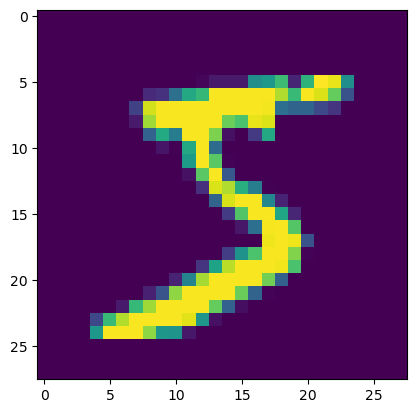

In [12]:
plt.imshow(x_train[0])

In [19]:
y_train[0]

5

In [21]:
### Preprocessing

In [22]:
#One-hot encoding labels:

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [15]:
y_cat_train = to_categorical(y_train, num_classes = 10)

In [35]:
#Scaling Data:

In [7]:
x_train[0].max(), x_train[0].min()

(255, 0)

In [16]:
x_train = x_train / 255
y_train = y_train / 255

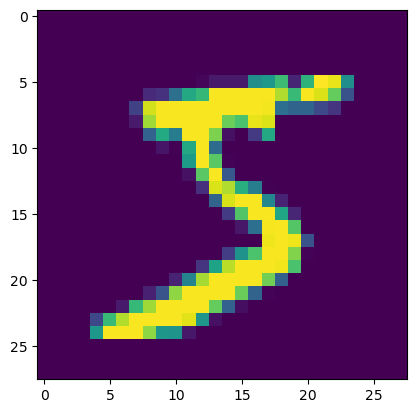

In [9]:
plt.imshow(x_train[0])

In [57]:
### Reshaping Data:

In [49]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [17]:
x_train = x_train.reshape(60000, 28, 28, 1) #1 so images are in 1 color channel

In [18]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [55]:
#Building + Training Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [13]:
model = Sequential()

#Conv'l Layer:
model.add(Conv2D(filters = 32, kernel_size=(4,4), input_shape = (28,28,1), activation='relu'))

#Pooling Layer:
model.add(MaxPool2D(pool_size=(2,2)))

#Flattening Layer to then be passed into a dense layer:
model.add(Flatten())

#Dense Layer:
model.add(Dense(units=128, activation='relu'))

#Output Layer:
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
#Going to include early stopping:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [67]:
## Training the Model

In [16]:
model.fit(x = x_train, y = y_cat_train, callbacks=[early_stop], epochs = 10,
         validation_data=(x_test, y_cat_test))

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1436 - accuracy: 0.9575 - val_loss: 21.9727 - val_accuracy: 0.9547
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0498 - accuracy: 0.9845 - val_loss: 27.5776 - val_accuracy: 0.9568
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0320 - accuracy: 0.9899 - val_loss: 24.1409 - val_accuracy: 0.9646


In [17]:
metrics = pd.DataFrame(model.history.history)

In [18]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.143649,0.957533,21.972696,0.9547
1,0.049827,0.984550,27.577612,0.9568
2,0.032004,0.989867,24.140940,0.9646


<Axes: >

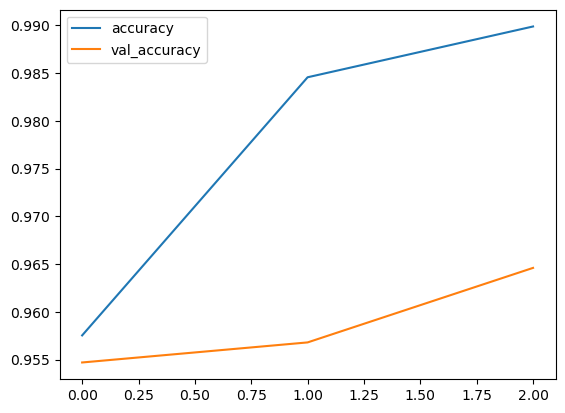

In [19]:
metrics[['accuracy', 'val_accuracy']].plot()

<Axes: >

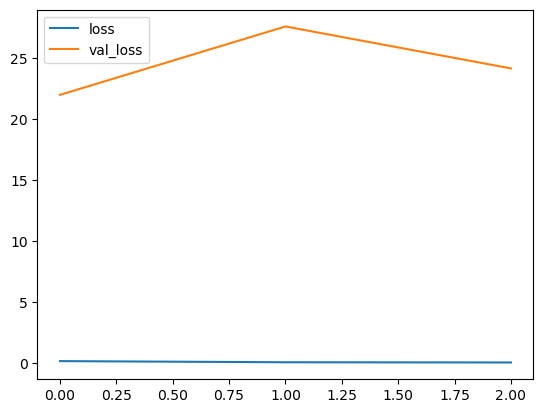

In [20]:
metrics[['loss', 'val_loss']].plot()

In [23]:
print(model.evaluate(x_test, y_cat_test, verbose=0))

[24.140939712524414, 0.9646000266075134]


In [24]:
## Changing Model parameters to see if accuracy can be increased:

In [42]:
model = Sequential()

#Conv'l Layer:
model.add(Conv2D(filters = 64, kernel_size=(3,3), input_shape = (28,28,1), activation='relu'))

#Pooling Layer:
model.add(MaxPool2D(pool_size=(2,2)))

#Flattening Layer to then be passed into a dense layer:
model.add(Flatten())

#Dense Layer:
model.add(Dense(units=264, activation='relu'))

#Output Layer:
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 3)

In [2]:
#Using low amount of epochs due to extended training times

In [44]:
model.fit(x = x_train, y = y_cat_train, callbacks=[early_stop], epochs = 10,
         validation_data=(x_test, y_cat_test))

Epoch 1/10
1875/1875 [==============================] - 91s 48ms/step - loss: 0.1280 - accuracy: 0.9611 - val_loss: 43.1106 - val_accuracy: 0.9338
Epoch 2/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0423 - accuracy: 0.9863 - val_loss: 35.3839 - val_accuracy: 0.9524
Epoch 3/10
1875/1875 [==============================] - 93s 50ms/step - loss: 0.0248 - accuracy: 0.9919 - val_loss: 40.7299 - val_accuracy: 0.9529
Epoch 4/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0150 - accuracy: 0.9948 - val_loss: 26.7844 - val_accuracy: 0.9703
Epoch 5/10
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0100 - accuracy: 0.9967 - val_loss: 79.1866 - val_accuracy: 0.9395
Epoch 6/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0086 - accuracy: 0.9969 - val_loss: 55.9110 - val_accuracy: 0.9603
Epoch 7/10
1875/1875 [==============================] - 91s 49ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 5

In [25]:
#Back to old model with a few adjusted parameters and a dropout layer added:

In [24]:
from tensorflow.keras.layers import Dropout

In [21]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [52]:
model = Sequential()

#Conv'l Layer:
model.add(Conv2D(filters = 32, kernel_size=(4,4), input_shape = (28,28,1), activation='relu'))

#Pooling Layer:
model.add(MaxPool2D(pool_size=(2,2)))

#Flattening Layer to then be passed into a dense layer:
model.add(Flatten())

#Dense Layer:
model.add(Dense(units=256, activation='relu')) #More neurons used in dense layer
model.add(Dropout(0.2))
#Output Layer:
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model.fit(x = x_train, y = y_cat_train, callbacks=[early_stop], epochs = 10,
         validation_data=(x_test, y_cat_test))

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1384 - accuracy: 0.9578 - val_loss: 12.4175 - val_accuracy: 0.9743
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0480 - accuracy: 0.9852 - val_loss: 20.4783 - val_accuracy: 0.9667
Epoch 3/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0314 - accuracy: 0.9900 - val_loss: 18.1023 - val_accuracy: 0.9729


In [28]:
new_metrics = pd.DataFrame(model.history.history)

In [29]:
new_metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.138409,0.957783,12.417511,0.9743
1,0.047984,0.985200,20.478268,0.9667
2,0.031406,0.990000,18.102264,0.9729


In [30]:
new_metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<Axes: >

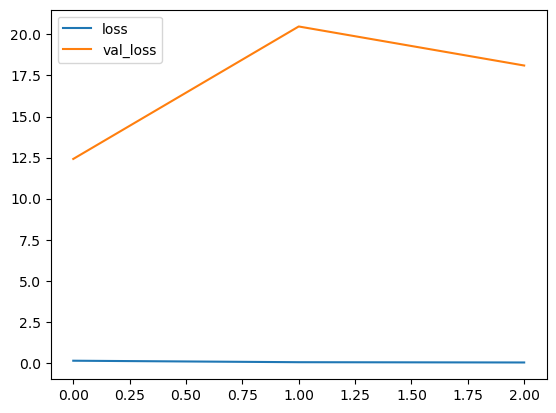

In [31]:
new_metrics[['loss', 'val_loss']].plot()

<Axes: >

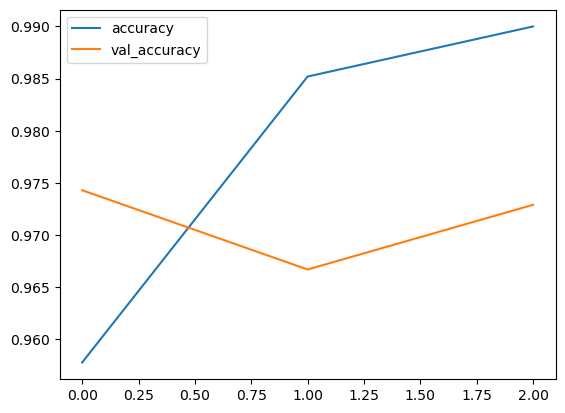

In [32]:
new_metrics[['accuracy', 'val_accuracy']].plot()

In [34]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 2s 5ms/step - loss: 18.1023 - accuracy: 0.9729


[18.102264404296875, 0.9728999733924866]

In [37]:
predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 2s 5ms/step


In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
print(confusion_matrix(y_test, predictions))

[[ 969    0    0    0    0    0    2    1    8    0]
 [   0 1100    0    2    0    0    2    0   31    0]
 [   1    0  967    1    1    0    3   12   47    0]
 [   0    0    2  976    0    3    0    2   22    5]
 [   0    0    2    0  969    0    0    0    5    6]
 [   4    0    0    6    0  842    7    1   25    7]
 [   2    1    0    0    2    1  939    0   13    0]
 [   0    0    3    1    0    0    0 1008   12    4]
 [   2    0    0    0    0    0    0    0  971    1]
 [   0    0    0    0    3    0    0    2   16  988]]


In [40]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.97      0.98      1135
           2       0.99      0.94      0.96      1032
           3       0.99      0.97      0.98      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.94      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.84      1.00      0.91       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.97     10000
   macro avg       0.98      0.97      0.97     10000
weighted avg       0.98      0.97      0.97     10000



In [50]:
## Accuracy could be further improved through data augmentation, different optimizers/loss functions, more layers and filters, 
#L1 / L2 regularization, different pooling methods, etc.

In [51]:
#Predicting a single image:

In [44]:
img_to_predict = x_test[0]

In [45]:
img_to_predict.shape

(28, 28, 1)

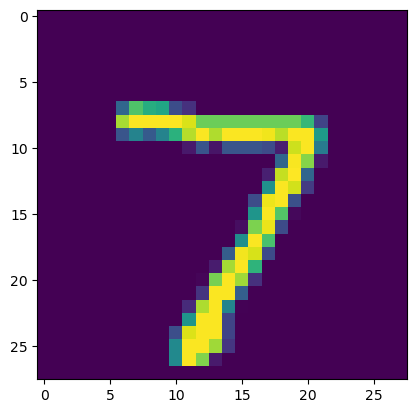

In [46]:
plt.imshow(img_to_predict.reshape(28,28))

In [48]:
np.argmax(model.predict(img_to_predict.reshape(1,28,28,1)), axis=-1) #Dimensions: (num_imgs, img_width, img_height, color channels)

1/1 [==============================] - 0s 43ms/step


array([7])

In [49]:
y_test[0]

7